## Load libraries
- python 3.7.3
- networkx 2.3
- pandas 0.24.2
- numpy 1.16.3
- matplotlib 3.1.0
- seaborn 0.9.0
- community 0.13 (python-louvain is the package name)

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import community

In [2]:
# Get rid of warning information
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set Seaborn styles for better looking figures
sns.set_palette("Accent")
sns.set_context(context='paper')

## read in cosine similarity matrix

In [4]:
cos_mx = pd.read_excel("./datasets/Cos-reduced-normalized.xlsx")
cos_mx = cos_mx.drop(columns='Unnamed: 0')

## display percentile for edge strength for sensitivity test
We will remove the weakest 25, 50, 70 and 90 percent of edges to see how the network changes

In [5]:
for i in [10, 25,50,70, 75, 90]:
    print("percentile", i, np.percentile(cos_mx.values,i))

percentile 10 -0.06483691851336694
percentile 25 0.05022210440039383
percentile 50 0.236805286219395
percentile 70 0.3865894712354946
percentile 75 0.4263376266913603
percentile 90 0.6251333724450284


In [6]:
## load reduced dataset with real values 
property_mx = pd.read_excel("./datasets/Reduced_with-real-values.xlsx")
property_mx = property_mx.drop(columns='Unnamed: 0')

In [7]:
## load reduced dataset with real values to keep the copy
dfreal = pd.read_excel('./datasets/Reduced_with-real-values.xlsx')
dfreal = dfreal.drop(columns='Unnamed: 0')

29


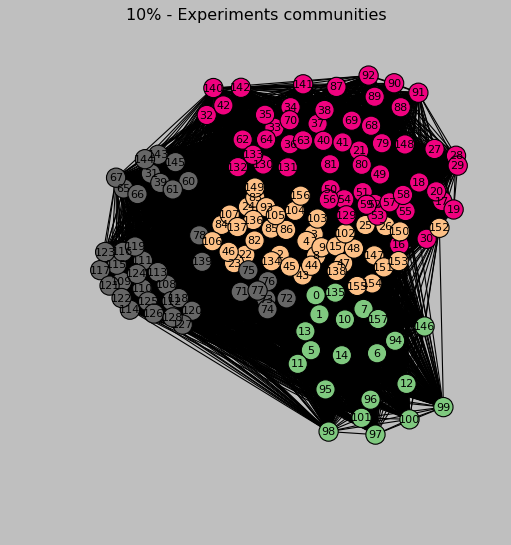

In [8]:
#set threshold - to remove 10% of edges
threshold = 0.0
cos_mx = cos_mx.where(cos_mx > threshold, 0)
G = nx.Graph()

nodes = list(cos_mx.index)
edges = []

for i in cos_mx.index:
    for j in range(i+1):
        if cos_mx.iloc[i,j] > 0:
            edges.append([i, j, cos_mx.iloc[i,j]])

# add nodes and edges to network
G.add_nodes_from(nodes)            
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G,seed=103)

for i in range(29,30):
    print(i)
    part = community.best_partition(G, random_state=i)
    values = [part.get(node) for node in G.nodes()]


    dfreal['Community_number'] = pd.Series(part)
    property_mx['Community_number'] = pd.Series(part)


    pos = nx.spring_layout(G,seed=103)
    plt.style.use('classic')
    #Draw graph
    plt.figure(figsize=(8,8)) #Increase graph size
    nx.draw_networkx(G, pos, nodelist = nodes, edgelist = edges,
                     with_labels = False, node_color = values, alpha = 1, cmap = "Accent")
    nx.draw_networkx_labels(G, pos, font_size = 10)
    plt.axis("off")
    plt.title("10% - Experiments communities")
#     plt.margins(0.09)

    plt.savefig('./figures/Community-10%.png',transparent=True)
    plt.show()

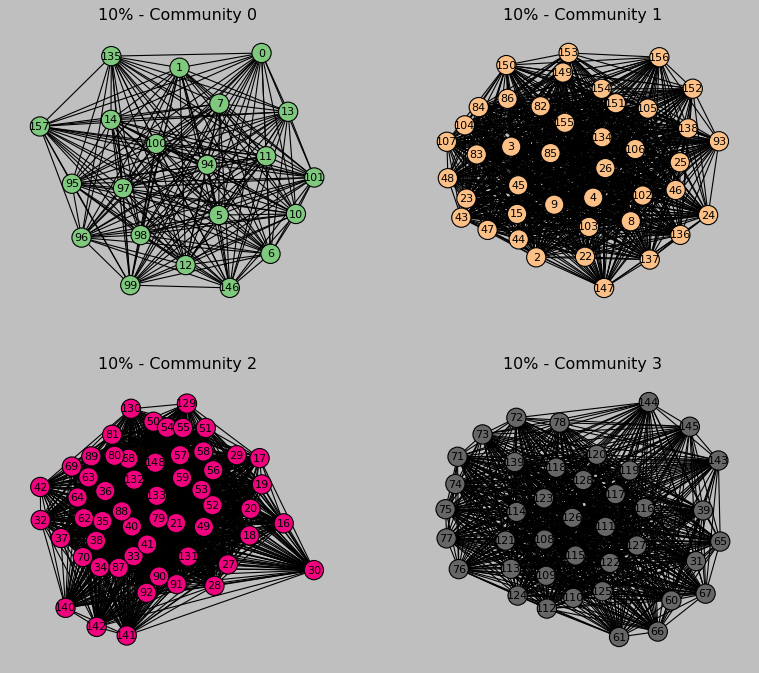

In [9]:
colname = 'Community_number'
color = 'Accent'            
isLog=True, 
isRatio=False, 
ratio=False

#set up colormap and normalization
node_col = np.array(property_mx[colname])
col_cmap = mpl.cm.get_cmap(color, 10)
col_norm = mpl.colors.Normalize(vmin = 0, vmax = 3)

# Define subplots
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches((12,10))

for i in range(0, max(values)+1): #cycle through each community
    ax = axs[i//2, i%2]
    g = nx.Graph()

    g_nodes = []
    g_colors=[]
    for j, v in enumerate(values):
        if v == i:
            g_nodes.append(nodes[j])
            g_colors.append(col_cmap(col_norm(v))) 
        
    g_edges = []
    for j, v in enumerate(edges):
        if v[0] in g_nodes and v[1] in g_nodes:
            g_edges.append(v)
            

    g.add_nodes_from(g_nodes)            
    g.add_weighted_edges_from(g_edges)
    g_pos = nx.spring_layout(g, seed=138)

    nx.draw_networkx(g, g_pos, nodelist = g_nodes, edgelist = g_edges, with_labels = False, 
                     node_color = g_colors, alpha = 1, ax=ax)
    nx.draw_networkx_labels(g, g_pos, font_size = 10, ax=ax)
    ax.axis("off")
    ax.set_title("10% - Community {}".format(i))
    ax.margins(0.1)

plt.savefig('./figures/Z-10%_community_{}.png'.format(colname), transparent=True)

29


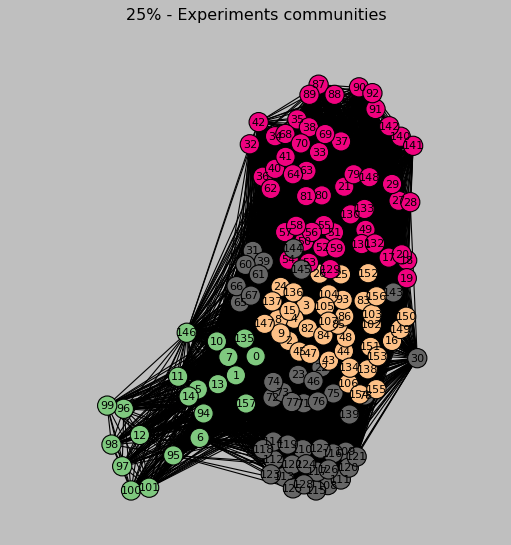

In [10]:
#set threshold - to remove 25% of edges
threshold = 0.05
cos_mx = cos_mx.where(cos_mx > threshold, 0)
G = nx.Graph()

nodes = list(cos_mx.index)
edges = []

for i in cos_mx.index:
    for j in range(i+1):
        if cos_mx.iloc[i,j] > 0:
            edges.append([i, j, cos_mx.iloc[i,j]])

# add nodes and edges to network
G.add_nodes_from(nodes)            
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G,seed=103)
plt.style.use('classic')

for i in range(29,30):
    print(i)
    part = community.best_partition(G, random_state=i)
    values = [part.get(node) for node in G.nodes()]


    dfreal['Community_number'] = pd.Series(part)

    pos = nx.spring_layout(G,seed=138)
    #Draw graph
    plt.figure(figsize=(8,8)) #Increase graph size
    nx.draw_networkx(G, pos, nodelist = nodes, edgelist = edges,
                     with_labels = False, node_color = values, alpha = 1, cmap = "Accent")
    nx.draw_networkx_labels(G, pos, font_size = 10)
    plt.axis("off")
    plt.title("25% - Experiments communities")
#     plt.margins(0.09)

    plt.savefig('./figures/Community-25%.png',transparent=True)
    plt.show()

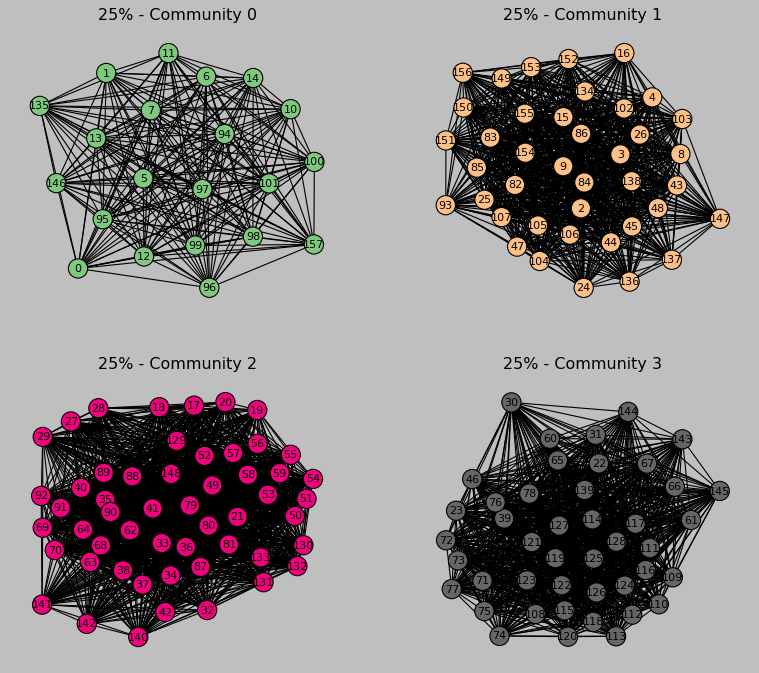

In [11]:
colname = 'Community_number'
color = 'Accent'            
isLog=True, 
isRatio=False, 
ratio=False

#set up colormap and normalization
node_col = np.array(property_mx[colname])
col_cmap = mpl.cm.get_cmap(color, 10)
col_norm = mpl.colors.Normalize(vmin = 0, vmax = 3)

# Define subplots
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches((12,10))

for i in range(0, max(values)+1): #cycle through each community
    ax = axs[i//2, i%2]
    g = nx.Graph()

    g_nodes = []
    g_colors=[]
    for j, v in enumerate(values):
        if v == i:
            g_nodes.append(nodes[j])
            g_colors.append(col_cmap(col_norm(v))) 
        
    g_edges = []
    for j, v in enumerate(edges):
        if v[0] in g_nodes and v[1] in g_nodes:
            g_edges.append(v)
            

    g.add_nodes_from(g_nodes)            
    g.add_weighted_edges_from(g_edges)
    g_pos = nx.spring_layout(g, seed=103)

    nx.draw_networkx(g, g_pos, nodelist = g_nodes, edgelist = g_edges, with_labels = False, 
                     node_color = g_colors, alpha = 1, ax=ax)
    nx.draw_networkx_labels(g, g_pos, font_size = 10, ax=ax)
    ax.axis("off")
    ax.set_title("25% - Community {}".format(i))
    ax.margins(0.1)

plt.savefig('./figures/Z-25%_community_{}.png'.format(colname), transparent=True)

29


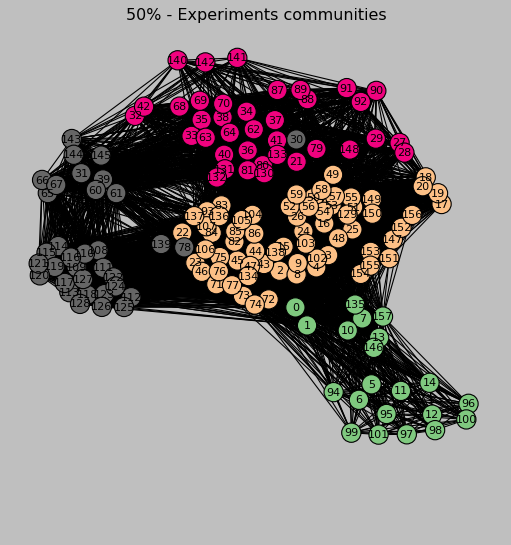

In [12]:
#set threshold - to remove 50% of edges
threshold = 0.24
cos_mx = cos_mx.where(cos_mx > threshold, 0)
G = nx.Graph()

nodes = list(cos_mx.index)
edges = []

for i in cos_mx.index:
    for j in range(i+1):
        if cos_mx.iloc[i,j] > 0:
            edges.append([i, j, cos_mx.iloc[i,j]])

# add nodes and edges to network
G.add_nodes_from(nodes)            
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G,seed=103)
plt.style.use('classic')

for i in range(29,30):
    print(i)
    part = community.best_partition(G, random_state=i)
    values = [part.get(node) for node in G.nodes()]


    dfreal['Community_number'] = pd.Series(part)

    pos = nx.spring_layout(G,seed=138)
    #Draw graph
    plt.figure(figsize=(8,8)) #Increase graph size
    nx.draw_networkx(G, pos, nodelist = nodes, edgelist = edges,
                     with_labels = False, node_color = values, alpha = 1, cmap = "Accent")
    nx.draw_networkx_labels(G, pos, font_size = 10)
    plt.axis("off")
    plt.title("50% - Experiments communities")
#     plt.margins(0.09)

    plt.savefig('./figures/Community-50%.png',transparent=True)
    plt.show()

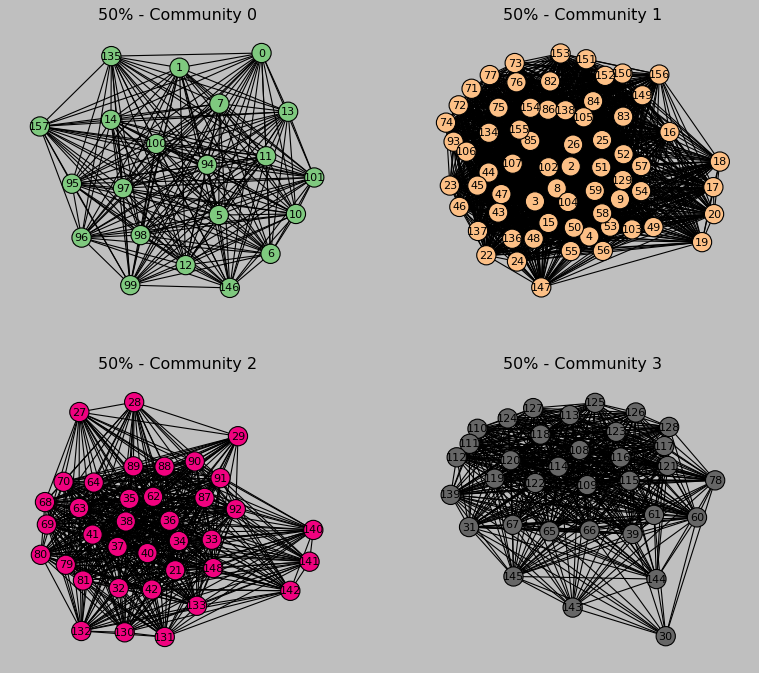

In [13]:
colname = 'Community_number'
color = 'Accent'            
isLog=True, 
isRatio=False, 
ratio=False

#set up colormap and normalization
node_col = np.array(property_mx[colname])
col_cmap = mpl.cm.get_cmap(color, 10)
col_norm = mpl.colors.Normalize(vmin = 0, vmax = 3)

# Define subplots
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches((12,10))

for i in range(0, max(values)+1): #cycle through each community
    ax = axs[i//2, i%2]
    g = nx.Graph()

    g_nodes = []
    g_colors=[]
    for j, v in enumerate(values):
        if v == i:
            g_nodes.append(nodes[j])
            g_colors.append(col_cmap(col_norm(v))) 
        
    g_edges = []
    for j, v in enumerate(edges):
        if v[0] in g_nodes and v[1] in g_nodes:
            g_edges.append(v)
            

    g.add_nodes_from(g_nodes)            
    g.add_weighted_edges_from(g_edges)
    g_pos = nx.spring_layout(g, seed=138)

    nx.draw_networkx(g, g_pos, nodelist = g_nodes, edgelist = g_edges, with_labels = False, 
                     node_color = g_colors, alpha = 1, ax=ax)
    nx.draw_networkx_labels(g, g_pos, font_size = 10, ax=ax)
    ax.axis("off")
    ax.set_title("50% - Community {}".format(i))
    ax.margins(0.1)

plt.savefig('./figures/Z-50%_community_{}.png'.format(colname), transparent=True)

29


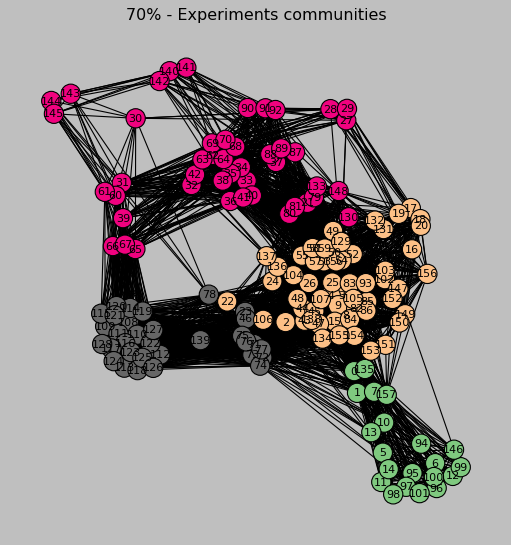

In [14]:
#set threshold - to remove 70% of edges
threshold = 0.39
cos_mx = cos_mx.where(cos_mx > threshold, 0)
G = nx.Graph()

nodes = list(cos_mx.index)
edges = []

for i in cos_mx.index:
    for j in range(i+1):
        if cos_mx.iloc[i,j] > 0:
            edges.append([i, j, cos_mx.iloc[i,j]])

# add nodes and edges to network
G.add_nodes_from(nodes)            
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G,seed=103)
plt.style.use('classic')

# dfreal = pd.read_csv('Reduced_light-version-real-values.csv')
# dfreal = dfreal.drop(columns='Unnamed: 0')

for i in range(29,30):
    print(i)
    part = community.best_partition(G, random_state=i)
    values = [part.get(node) for node in G.nodes()]


    dfreal['Community_number'] = pd.Series(part)

    pos = nx.spring_layout(G,seed=103)
    #Draw graph
    plt.figure(figsize=(8,8)) #Increase graph size
    nx.draw_networkx(G, pos, nodelist = nodes, edgelist = edges,
                     with_labels = False, node_color = values, alpha = 1, cmap = "Accent")
    nx.draw_networkx_labels(G, pos, font_size = 10)
    plt.axis("off")
    plt.title("70% - Experiments communities")
    plt.margins(0.09)

    plt.savefig('./figures/Community-70%.png',transparent=True)
    plt.show()

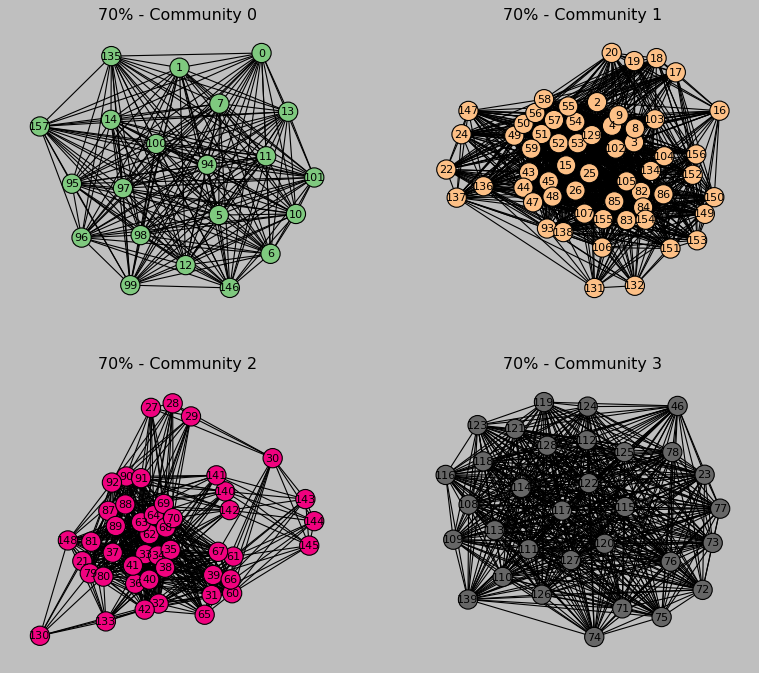

In [15]:
colname = 'Community_number'
color = 'Accent'            
isLog=True, 
isRatio=False, 
ratio=False

#set up colormap and normalization
node_col = np.array(property_mx[colname])
col_cmap = mpl.cm.get_cmap(color, 10)
col_norm = mpl.colors.Normalize(vmin = 0, vmax = 3)

# Define subplots
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches((12,10))

for i in range(0, max(values)+1): #cycle through each community
    ax = axs[i//2, i%2]
    g = nx.Graph()

    g_nodes = []
    g_colors=[]
    for j, v in enumerate(values):
        if v == i:
            g_nodes.append(nodes[j])
            g_colors.append(col_cmap(col_norm(v))) 
        
    g_edges = []
    for j, v in enumerate(edges):
        if v[0] in g_nodes and v[1] in g_nodes:
            g_edges.append(v)
            

    g.add_nodes_from(g_nodes)            
    g.add_weighted_edges_from(g_edges)
    g_pos = nx.spring_layout(g, seed=138)

    nx.draw_networkx(g, g_pos, nodelist = g_nodes, edgelist = g_edges, with_labels = False, 
                     node_color = g_colors, alpha = 1, ax=ax)
    nx.draw_networkx_labels(g, g_pos, font_size = 10, ax=ax)
    ax.axis("off")
    ax.set_title("70% - Community {}".format(i))
    ax.margins(0.1)

plt.savefig('./figures/Z-70%_community_{}.png'.format(colname), transparent=True)

29


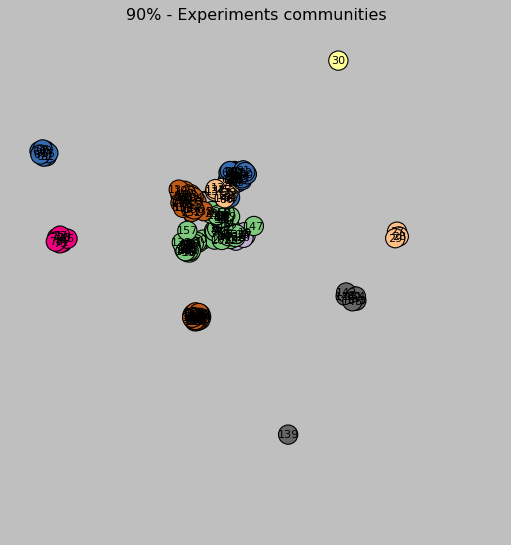

In [16]:
#set threshold - to remove 90% of edges
threshold = 0.63
cos_mx = cos_mx.where(cos_mx > threshold, 0)
G = nx.Graph()

nodes = list(cos_mx.index)
edges = []

for i in cos_mx.index:
    for j in range(i+1):
        if cos_mx.iloc[i,j] > 0:
            edges.append([i, j, cos_mx.iloc[i,j]])

# add nodes and edges to network
G.add_nodes_from(nodes)            
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G,seed=138)
plt.style.use('classic')

for i in range(29,30):
    print(i)
    part = community.best_partition(G, random_state=i)
    values = [part.get(node) for node in G.nodes()]


    dfreal['Community_number'] = pd.Series(part)

    pos = nx.spring_layout(G,seed=138)
    #Draw graph
    plt.figure(figsize=(8,8)) #Increase graph size
    nx.draw_networkx(G, pos, nodelist = nodes, edgelist = edges,
                     with_labels = False, node_color = values, alpha = 1, cmap = "Accent")
    nx.draw_networkx_labels(G, pos, font_size = 10)
    plt.axis("off")
    plt.title("90% - Experiments communities")
#     plt.margins(0.09)

    plt.savefig('./figures/Community-90%.png',transparent=True)
    plt.show()

## No need to plot in individual communities because there are too many of them

In [17]:

# colname = 'Community_number'
# color = 'Accent'            
# isLog=True, 
# isRatio=False, 
# ratio=False

# #set up colormap and normalization
# node_col = np.array(property_mx[colname])
# col_cmap = mpl.cm.get_cmap(color, 10)
# col_norm = mpl.colors.Normalize(vmin = 0, vmax = 3)

# # Define subplots
# fig, axs = plt.subplots(nrows=2, ncols=2)
# fig.set_size_inches((12,10))

# for i in range(0, max(values)+1): #cycle through each community
#     ax = axs[i//2, i%2]
#     g = nx.Graph()

#     g_nodes = []
#     g_colors=[]
#     for j, v in enumerate(values):
#         if v == i:
#             g_nodes.append(nodes[j])
#             g_colors.append(col_cmap(col_norm(v))) 
        
#     g_edges = []
#     for j, v in enumerate(edges):
#         if v[0] in g_nodes and v[1] in g_nodes:
#             g_edges.append(v)
            

#     g.add_nodes_from(g_nodes)            
#     g.add_weighted_edges_from(g_edges)
#     g_pos = nx.spring_layout(g, seed=138)

#     nx.draw_networkx(g, g_pos, nodelist = g_nodes, edgelist = g_edges, with_labels = False, 
#                      node_color = g_colors, alpha = 1, ax=ax)
#     nx.draw_networkx_labels(g, g_pos, font_size = 10, ax=ax)
#     ax.axis("off")
#     ax.set_title("90% - Community {}".format(i))
#     ax.margins(0.1)

# # plt.savefig('Z_community_{}.png'.format(colname), transparent=True)